In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [363]:
#Read the data
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [364]:
#check number of rows and columns
day.shape

(730, 16)

In [365]:
#check for any null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [366]:
#have an overall idea of data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [367]:
#drop columns - instant(only serial number) , dteday( year and month already present) ,casual and registered(they sum up to cnt)
day=day.drop(['instant','dteday','casual','registered'],axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [368]:
# rename columns for clarity
day.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [369]:
#rename the column values according to data dictionary
day['season'] = day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day['month']=day['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day['weathersit']=day['weathersit'].map({1: 'Clear/ Partly cloudy',2:'Mist + Cloudy',3:'Light Snow /rain',4:'Snow /Thunderstorm'})
day['weekday']=day['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/ Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/ Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/ Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


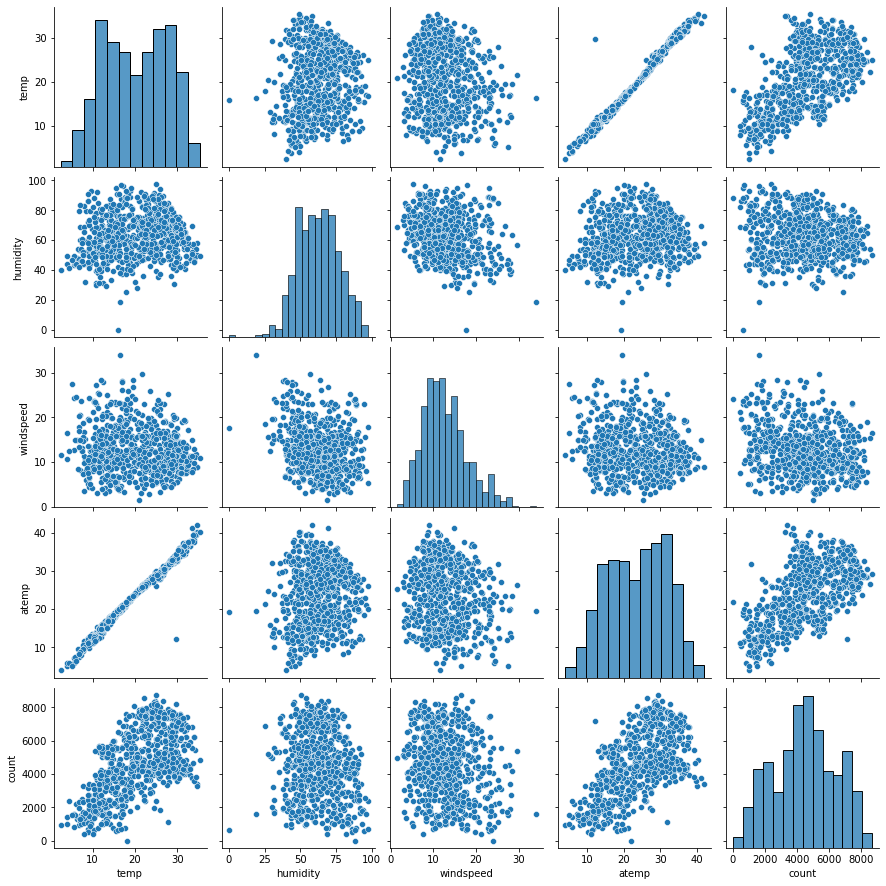

In [370]:
#List of numeric values for pairplot - temp, humidity,casual,windspeed,registered,atemp,count)
sns.pairplot(day, vars=['temp','humidity','windspeed','atemp','count'])
plt.show()

In [371]:
#observation - 
#2.temp and atemp are almost same except for 1 outlier so we will remove atemp
day=day.drop(['atemp'],axis=1)

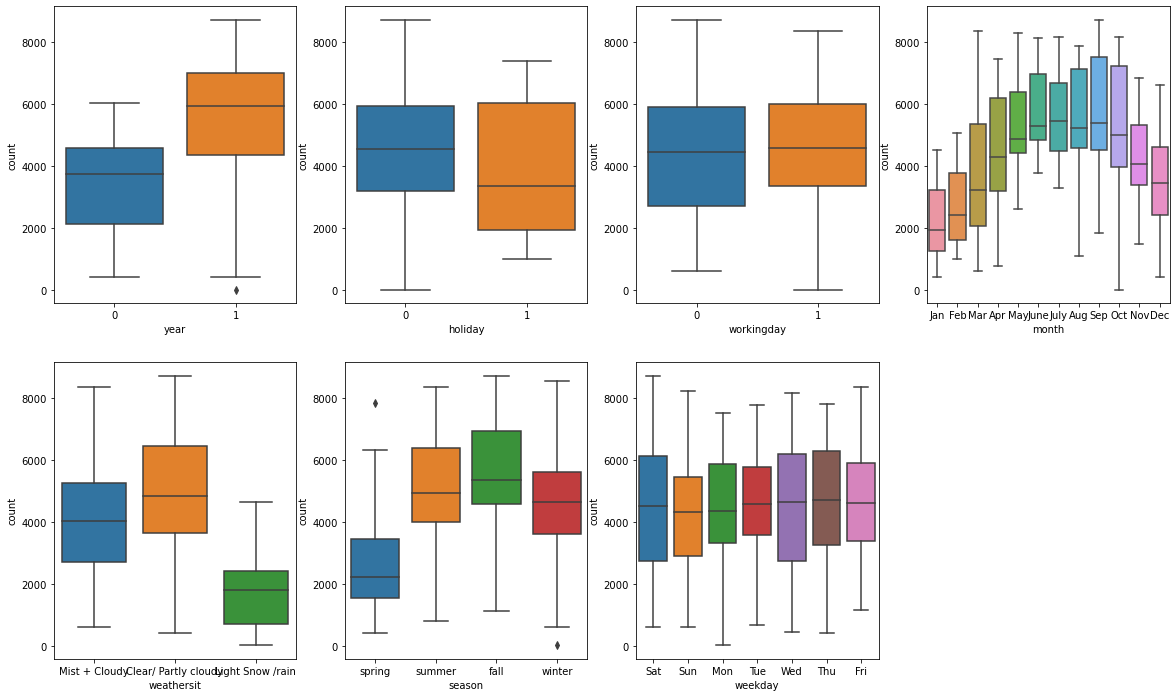

In [372]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = day)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = day)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = day)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = day)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = day)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = day)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = day)

plt.show()

In [373]:
#observations: Count is higher -
#in year 2019
#On a non-holiday
#in month of July and September
#On partly cloudy day
#in fall season
#on saturday


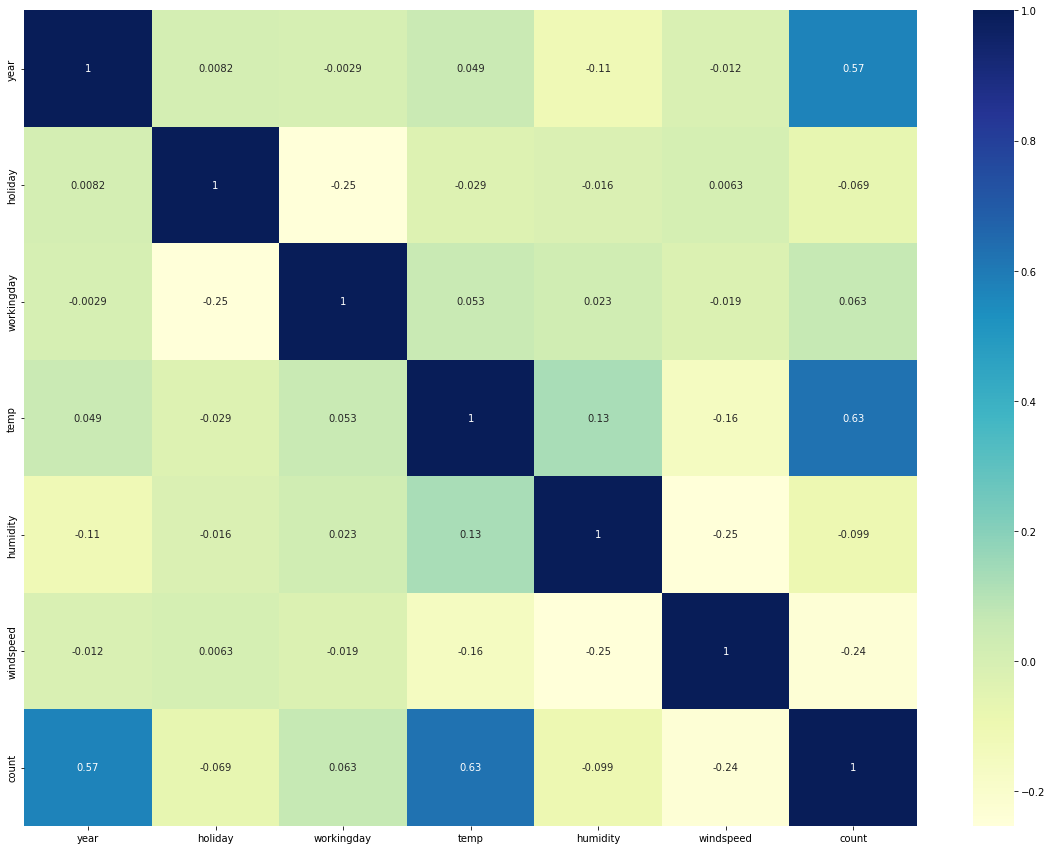

In [374]:
plt.figure(figsize=(20, 15))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [375]:
#Observation-Good corelation between tem and count
#Now we will create dummy variables for categorical variables
seasons=pd.get_dummies(day['season'])
seasons.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [376]:
seasons=pd.get_dummies(day['season'],drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [377]:
weekdays=pd.get_dummies(day['weekday'],drop_first=True)
weekdays.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [378]:
months=pd.get_dummies(day['month'],drop_first=True)
months.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [379]:
weathers=pd.get_dummies(day['weathersit'],drop_first=True)
weathers.head()


,Light Snow /rain,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [380]:
# Weathersit has no entry for 4:'Snow /Thunderstorm
#now we will add the new columns and remove the older ones from which dummies were created
day=pd.concat([seasons,weekdays,months,weathers,day],axis=1)
day.drop(['season','weekday','month','weathersit'], axis = 1, inplace = True)
day.head()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Sep,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [381]:
#TRAIN _TEST SPLIT

df_train,df_test = train_test_split(day,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [382]:
#Next Step:Normalization-bring data betweeen range of 0 to 1

scaler = MinMaxScaler()
#Providing numeric variables
num_vars=['temp','humidity','windspeed','count']
#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Sep,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.751824,0.380981,0.191095


In [383]:
#Now the values are brought between 0 and 1
df_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


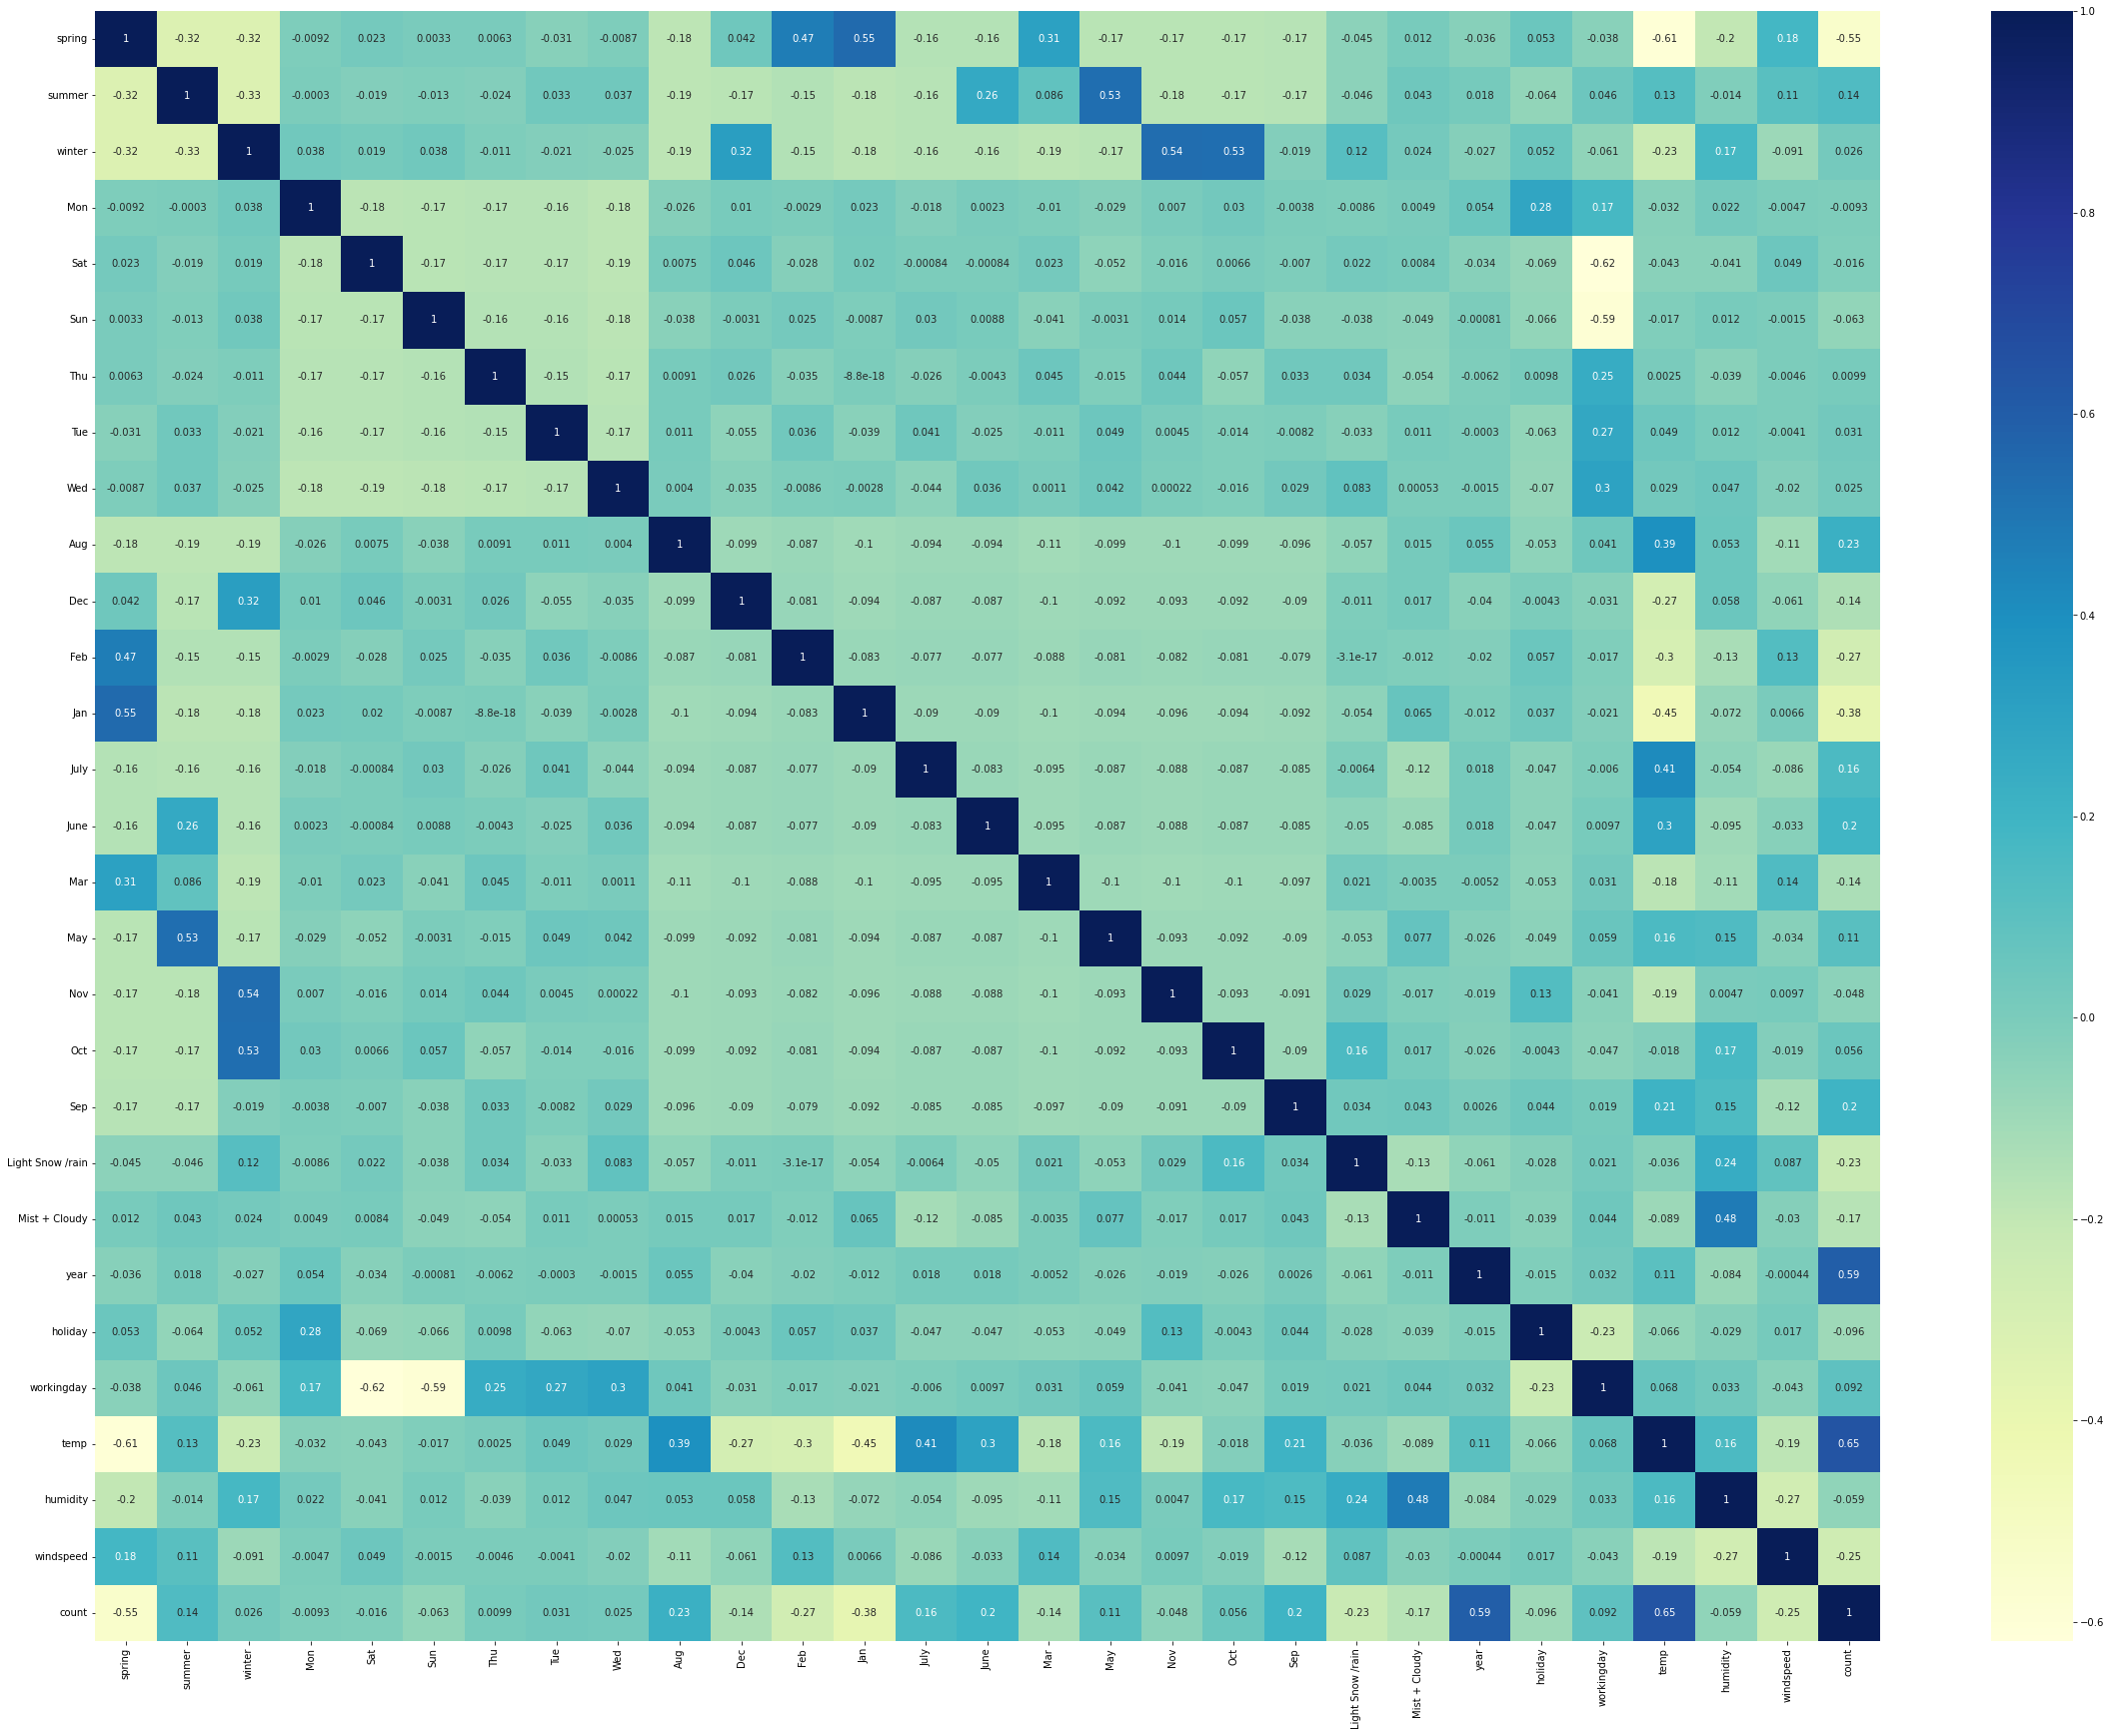

In [384]:
plt.figure(figsize=(40,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [385]:
#Selection of X and Y for our train dataset

y_train=df_train.pop('count')
X_train=df_train


In [386]:
print(X_train.head())
print(y_train.head())

     spring  summer  winter  Mon  Sat  Sun  Thu  Tue  Wed  Aug  ...  Oct  Sep  \
576       0       0       0    0    0    0    0    1    0    0  ...    0    0   
426       1       0       0    0    1    0    0    0    0    0  ...    0    0   
728       1       0       0    0    0    1    0    0    0    0  ...    0    0   
482       0       1       0    0    1    0    0    0    0    0  ...    0    0   
111       0       1       0    0    0    0    0    0    0    0  ...    0    0   

     Light Snow /rain  Mist + Cloudy  year  holiday  workingday      temp  \
576                 0              0     1        0           1  0.815169   
426                 0              1     1        0           0  0.442393   
728                 0              0     1        0           0  0.245101   
482                 0              1     1        0           0  0.395666   
111                 0              1     0        0           1  0.345824   

     humidity  windspeed  
576  0.725633   0.26468

In [387]:
#add constant
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params

const               0.243106
spring             -0.044834
summer              0.043002
winter              0.107632
Mon                -0.020931
Sat                 0.095554
Sun                 0.041333
Thu                -0.009131
Tue                -0.017931
Wed                -0.005495
Aug                 0.020376
Dec                -0.044277
Feb                -0.032441
Jan                -0.063315
July               -0.033848
June                0.004602
Mar                 0.001274
May                 0.024673
Nov                -0.039879
Oct                 0.007546
Sep                 0.085938
Light Snow /rain   -0.255835
Mist + Cloudy      -0.059551
year                0.232438
holiday             0.010042
workingday          0.096177
temp                0.445359
humidity           -0.151473
windspeed          -0.186010
dtype: float64

In [388]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.00e-181
Time:                        04:38:26   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2431      0.035      6.888      0.000       0.174       0.312
spring              -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer               0.0430      0.026      1.645      0.101      -0.008       0.094
winter               0.1076      0.028      3.853      0.000       0.053       0.163
Mon                 -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat                  0.0956      0.014      6.958      0.000       0.069       0.123
Sun                  0.0413      0.014      2.964      0.003       0.014       0.069
Thu                 -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue                 -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed                 -0.0055      0.015     -0.368      0.713      -0.035       0.024
Aug                  0.0204      0.034      0.607      0.544      -0.046       0.086
Dec                 -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb                 -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan                 -0.0633      0.034     -1.885      0.060      -0.129       0.003
July                -0.0338      0.035     -0.969      0.333      -0.102       0.035
June                 0.0046      0.025      0.186      0.853      -0.044       0.053
Mar                  0.0013      0.025      0.052      0.959      -0.047       0.050
May                  0.0247      0.021      1.173      0.241      -0.017       0.066
Nov                 -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct                  0.0075      0.036      0.210      0.834      -0.063       0.078
Sep                  0.0859      0.032      2.692      0.007       0.023       0.149
Light Snow /rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy       -0.0596      0.010     -5.709      0.000      -0.080      -0.039
year                 0.2324      0.008     28.819      0.000       0.217       0.248
holiday              0.0100      0.024      0.418      0.676      -0.037       0.057
workingday           0.0962      0.012      7.835      0.000       0.072       0.120
temp                 0.4454      0.046      9.628      0.000       0.354       0.536
humidity            -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed           -0.1860      0.026     -7.226      0.000      -0.237      -0.135
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. N

In [389]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
24,workingday,85.54
4,Sat,19.71
5,Sun,18.34
0,spring,10.75
2,winter,9.44
1,summer,8.27
25,temp,7.08
17,Nov,6.79
18,Oct,6.47
9,Aug,6.36


In [390]:
#Now we will check which variables to remove based on the VIF and pvalue

In [391]:
#removing Spring due to high pvalue and VIF
X=X_train.drop('spring',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          8.68e-182
Time:                        04:38:27   Log-Likelihood:                 525.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     483   BIC:                            -883.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2209      0.032  

,Features,VIF
23,workingday,70.94
3,Sat,16.17
4,Sun,15.16
24,temp,6.97
16,Nov,6.78
17,Oct,6.47
1,winter,6.04
9,Dec,5.63
11,Jan,5.23
8,Aug,5.08


In [392]:
#Although the VIF values of workingay,sat are veru=y high, we will not drop them becaure theirp value is 0 or close to 0.
#We will try to find the next highest VIF for which p value is also considerably high
#removing Nov due to high pvalue and VIF
X=X.drop('Nov',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.42e-182
Time:                        04:38:27   Log-Likelihood:                 525.25
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     484   BIC:                            -888.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2047      0.028  

,Features,VIF
22,workingday,56.51
3,Sat,12.78
4,Sun,12.07
23,temp,6.71
8,Aug,3.96
1,winter,3.81
12,July,3.79
11,Jan,3.31
0,summer,3.26
21,holiday,3.17


In [393]:
#removing July due to very high pvalue
X=X.drop('July',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     115.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.31e-183
Time:                        04:38:27   Log-Likelihood:                 525.25
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     485   BIC:                            -894.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2049      0.028  

,Features,VIF
21,workingday,56.25
3,Sat,12.70
4,Sun,12.01
22,temp,4.36
1,winter,3.30
11,Jan,3.21
20,holiday,3.17
0,summer,2.61
10,Feb,2.32
23,humidity,2.00


In [394]:
#removing Holiday due to very high pvalue
X=X.drop('holiday',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     115.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.31e-183
Time:                        04:38:27   Log-Likelihood:                 525.25
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     485   BIC:                            -894.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2024      0.044  

,Features,VIF
22,humidity,34.95
21,temp,22.81
20,workingday,20.35
3,Sat,5.85
4,Sun,5.55
23,windspeed,4.78
1,winter,3.82
0,summer,3.23
11,Jan,2.78
18,Mist + Cloudy,2.35


In [395]:
#removing temp due to very high pvalue and VIF
X=X.drop('Wed',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     121.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.29e-184
Time:                        04:38:27   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     486   BIC:                            -900.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1996      0.043  

,Features,VIF
21,humidity,34.42
20,temp,22.73
19,workingday,19.97
3,Sat,5.60
4,Sun,5.31
22,windspeed,4.76
1,winter,3.79
0,summer,3.22
10,Jan,2.76
17,Mist + Cloudy,2.32


In [396]:
#removing Sun due to very high pvalue and VIF
X=X.drop('Sun',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.72e-185
Time:                        04:38:27   Log-Likelihood:                 524.23
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     487   BIC:                            -905.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2321      0.036  

,Features,VIF
20,humidity,30.27
19,temp,19.70
18,workingday,5.69
21,windspeed,4.42
1,winter,3.58
0,summer,3.09
9,Jan,2.43
16,Mist + Cloudy,2.28
17,year,2.11
12,May,1.90


In [397]:
#removing Thu due to very high pvalue
X=X.drop('Thu',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.02e-186
Time:                        04:38:27   Log-Likelihood:                 523.96
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     488   BIC:                            -910.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2312      0.036  

,Features,VIF
19,humidity,30.27
18,temp,19.69
17,workingday,5.22
20,windspeed,4.42
1,winter,3.57
0,summer,3.09
8,Jan,2.43
15,Mist + Cloudy,2.27
16,year,2.11
11,May,1.90


In [398]:
#removing Mar due to very high pvalue
X=X.drop('Mar',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.4
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.57e-187
Time:                        04:38:28   Log-Likelihood:                 523.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     489   BIC:                            -917.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2340      0.032  

,Features,VIF
18,humidity,25.87
17,temp,17.74
16,workingday,5.02
19,windspeed,4.17
1,winter,3.10
0,summer,3.04
14,Mist + Cloudy,2.23
15,year,2.09
8,Jan,1.98
3,Sat,1.85


In [399]:
#removing Tue due to high pvalue and VIF
X=X.drop('Tue',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     146.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.98e-188
Time:                        04:38:28   Log-Likelihood:                 523.26
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     490   BIC:                            -921.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2352      0.032  

,Features,VIF
17,humidity,25.87
16,temp,17.72
15,workingday,4.73
18,windspeed,4.17
1,winter,3.10
0,summer,3.04
13,Mist + Cloudy,2.23
14,year,2.09
7,Jan,1.98
3,Sat,1.85


In [400]:
#removing June due to  high pvalue
X=X.drop('June',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          5.34e-189
Time:                        04:38:28   Log-Likelihood:                 522.71
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     491   BIC:                            -927.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2318      0.032  

,Features,VIF
16,humidity,24.98
15,temp,14.75
14,workingday,4.72
17,windspeed,4.10
1,winter,3.09
0,summer,2.80
12,Mist + Cloudy,2.22
13,year,2.08
7,Jan,1.96
3,Sat,1.85


In [401]:
#removing Dec due to very high pvalue
X=X.drop('Dec',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          6.87e-190
Time:                        04:38:28   Log-Likelihood:                 522.17
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     492   BIC:                            -932.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2257      0.032  

,Features,VIF
15,humidity,22.48
14,temp,13.64
13,workingday,4.69
16,windspeed,4.09
1,winter,3.00
0,summer,2.70
11,Mist + Cloudy,2.19
12,year,2.08
3,Sat,1.83
6,Jan,1.82


In [402]:
#removing May due to very high pvalue
X=X.drop('May',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.01e-190
Time:                        04:38:28   Log-Likelihood:                 521.47
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -937.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2200      0.031  

,Features,VIF
14,humidity,22.39
13,temp,13.59
12,workingday,4.69
15,windspeed,4.02
1,winter,3.00
0,summer,2.22
10,Mist + Cloudy,2.19
11,year,2.07
3,Sat,1.83
6,Jan,1.82


In [403]:
#removing Feb due to high pvalue
X=X.drop('Feb',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.66e-191
Time:                        04:38:28   Log-Likelihood:                 520.61
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2063      0.030  

,Features,VIF
13,humidity,19.44
12,temp,11.99
11,workingday,4.66
14,windspeed,3.79
1,winter,2.58
9,Mist + Cloudy,2.15
10,year,2.06
0,summer,1.97
3,Sat,1.82
4,Aug,1.61


In [404]:
#removing Mon due to high pvalue
X=X.drop('Mon',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.30e-192
Time:                        04:38:28   Log-Likelihood:                 519.26
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     495   BIC:                            -945.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2054      0.030  

,Features,VIF
12,humidity,19.37
11,temp,11.98
10,workingday,4.61
13,windspeed,3.79
1,winter,2.58
8,Mist + Cloudy,2.15
9,year,2.05
0,summer,1.97
2,Sat,1.81
3,Aug,1.61


In [405]:
#removing Jan due to high pvalue
X=X.drop('Jan',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.92e-192
Time:                        04:38:28   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1850      0.028  

,Features,VIF
11,humidity,16.06
10,temp,10.01
9,workingday,4.56
12,windspeed,3.76
1,winter,2.25
7,Mist + Cloudy,2.13
8,year,2.03
0,summer,1.83
2,Sat,1.79
3,Aug,1.60


In [406]:
#removing Oct due to high pvalue
X=X.drop('Oct',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.37e-192
Time:                        04:38:28   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1780      0.028  

,Features,VIF
10,humidity,16.03
9,temp,9.76
8,workingday,4.53
11,windspeed,3.76
6,Mist + Cloudy,2.12
7,year,2.02
0,summer,1.82
2,Sat,1.79
1,winter,1.75
3,Aug,1.59


In [407]:
#removing Aug due to high pvalue
X=X.drop('Aug',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          5.10e-191
Time:                        04:38:28   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1705      0.029  

,Features,VIF
9,humidity,15.96
8,temp,8.12
7,workingday,4.53
10,windspeed,3.73
5,Mist + Cloudy,2.10
6,year,2.02
2,Sat,1.79
1,winter,1.66
0,summer,1.58
3,Sep,1.20


In [408]:
#removing humidity due to high VIF
X=X.drop('humidity',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.13e-188
Time:                        04:38:28   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0750      0.019  

,Features,VIF
8,temp,4.76
7,workingday,4.04
9,windspeed,3.44
6,year,2.02
2,Sat,1.69
0,summer,1.57
5,Mist + Cloudy,1.53
1,winter,1.40
3,Sep,1.20
4,Light Snow /rain,1.08


In [409]:
#Now the VIF and p values for all these variables in in acceptable range
#But the number of variables is still high

In [410]:
y_train_pred=lr_model.predict(X_train_sm)

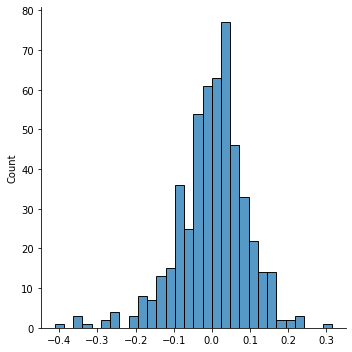

In [411]:
res=y_train-y_train_pred
sns.displot(res)

In [412]:
#errors are normallly distributed
num_vars=['temp','humidity','windspeed','count']
#2 Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Sep,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [413]:
df_test.describe()

,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,...,Sep,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.059091,...,0.086364,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.236333,...,0.281541,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [414]:
y_test=df_test.pop('count')
X_test=df_test

In [415]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,...,Oct,Sep,Light Snow /rain,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed
184,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0.831783,0.657364,0.084219
535,1.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0.901354,0.610133,0.153728
299,1.0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0.511964,0.837699,0.334206
221,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,1.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.817246,0.314298,0.537414


In [416]:
X_test_sm=X_test_sm.drop(['spring','Nov','July','holiday','Wed','Sun','Thu','Mar','Tue','June','Dec','May','Feb','Mon','Jan','Oct','Aug','humidity'], axis=1)

In [417]:
#predict
y_test_pred=lr_model.predict(X_test_sm)

In [418]:
#evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7961390438459766

In [ ]:
#R-squared training data =0.835
#R-squared from test data=0.796

#The model is good fit overall


In [ ]:
#Count=0.0750+0.0886(summer)+0.1307(winter)+0.0675(Sat)+0.0974(Sep)-0.2871 (Light snow/rain)-0.0800(Mist/cloudy)+0.2331(year)+0.0561(workingday)+0.5499(temp)-0.1552(windspeed)